# Pre-Trained YOLOv11 Model 

In [ ]:
# pip install matplotlib
# pip install opencv-python opencv-python-headless
# pip install --upgrade kagglehub
# pip install scipy
# pip install ultralytics


from ultralytics import YOLO

# For image only 

# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

# Run batched inference on a list of images
results = model(["image1.jpg", "image2.jpg"], stream=True, conf=0.8)  # return a generator of Results objects

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk

In [2]:
# For Both image and Video

In [ ]:
from ultralytics import YOLO
import cv2

# Load a pre-trained YOLO model
model = YOLO("yolo11n.pt")  # Replace "yolo11n.pt" with your specific YOLO version model

# Define a function for processing image inputs
def process_images(image_paths, conf_threshold=0.8):
    """
    Perform object detection on images and display/save results.
    
    :param image_paths: List of image file paths
    :param conf_threshold: Confidence threshold for detections
    """
    # Run inference on a list of images
    results = model(image_paths, stream=True, conf=conf_threshold)
    for result in results:
        # Extract relevant outputs
        boxes = result.boxes  # Bounding boxes
        masks = result.masks  # Segmentation masks
        keypoints = result.keypoints  # Pose estimation keypoints
        probs = result.probs  # Classification probabilities
        obb = result.obb  # Oriented bounding boxes

        # Show and save the results
        result.show()  # Display results
        result.save(filename="result.jpg")  # Save results as an image file


# Define a function for processing video inputs
def process_video(video_path, output_path="output.mp4", conf_threshold=0.8):
    """
    Perform object detection on a video and save the output.
    
    :param video_path: Path to the input video
    :param output_path: Path to save the processed video
    :param conf_threshold: Confidence threshold for detections
    """
    cap = cv2.VideoCapture(video_path)  # Load video
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Define video writer to save output
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Run YOLO inference on the frame
        results = model(frame, conf=conf_threshold)
        
        # Display and save results
        for result in results:
            result.show()  # Display detection in real-time
            annotated_frame = result.plot()  # Get annotated frame
            out.write(annotated_frame)  # Write frame to output video

    cap.release()
    out.release()


# Example usage
if __name__ == "__main__":
    # Process images
    image_paths = ["image1.jpg", "image2.jpg"]
    process_images(image_paths, conf_threshold=0.8)

    # Process video
    video_path = "input_video.mp4"
    output_path = "output_video.mp4"
    process_video(video_path, output_path, conf_threshold=0.8)


In [5]:
# The model has not perfromed good detecting the weapons in the images , so we are trying to train with customized annotations

# Annotations

In [7]:
# For Annotations we have 2 methods one popular is Roboflow, or LabelImg is a popular open-source graphical image annotation tool.
 #It's primarily used to label objects within images by drawing bounding boxes around them and assigning class labels. These annotated images are crucial for training computer vision models, particularly for object detection tasks

In [ ]:
!pip install labelimg
labelimg # Mac has issued with labelimg, so we have used Roboflow both are same for annotations with different agumentation methods

Sample resultant Annotations of an single object in an sample image

In [ ]:
{
  "predictions": [
    {
      "x": 904.5,
      "y": 639,
      "width": 361,
      "height": 508,
      "confidence": 0.942,
      "class": "Civilian",
      "class_id": 1,
      "detection_id": "fbdfba4f-36c6-46cb-8f58-bed4d8114215"
    }
  ]
}

# Fine-tuning or Transfer learning a YOLO Model

pre-trained model doesn't perform well on specific classes or tasks, so we fine-tune it. Our dataset contains objects not in the original training dataset of YOLO, Sp fine-tuning for domain-specific(survilence) data

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")  # pretrained YOLO11n model

# Train the model with MPS
results = model.train(data="/Users/tarakaparuchuru/Survilence/data.yaml",lr0=0.01, epochs=50, imgsz=640, device="mps")

data="data.yaml",  # Path to custom dataset configuration file, this file contains all the annotations used for training)
    epochs=50,  # Number of fine-tuning epochs
    imgsz=640,  # Image size
    batch=16,  # Batch size
    lr0=0.01  # Initial learning rate
    device="mps" #Stands for Metal Performance Shaders, which is Apple's framework for GPU acceleration on macOS.

In [ ]:
Final Trained model output

Validating /Users/tarakaparuchuru/PycharmProjects/OpenCV/runs/detect/train3/weights/best.pt...
Ultralytics 8.3.32 🚀 Python-3.11.5 torch-2.5.1 MPS (Apple M1 Pro)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]
                   all          7         39     0.0145      0.748      0.228       0.14
              Attacker          3          3    0.00609          1      0.256       0.15
              Civilian          3          5     0.0174          1     0.0673     0.0336
                Police          3         13    0.00858      0.769      0.499      0.334
                Weapon          7         18     0.0258      0.222     0.0883     0.0422
Speed: 1.4ms preprocess, 117.8ms inference, 0.0ms loss, 9.6ms postprocess per image
Results saved to /Users/tarakaparuchuru/PycharmProjects/OpenCV/runs/detect/train3


Intial Training with few epochs didn't give proper results of detections, but the raise of epochs like 50 gave better pefromance. So the finall trained model is best.pt

In [ ]:
from ultralytics import YOLO
import os

# Load the trained model
model = YOLO('/Users/tarakaparuchuru/PycharmProjects/OpenCV/runs/detect/train4/weights/best.pt')

# Set the path to your test image
image_path = '/Users/tarakaparuchuru/Downloads/knife.jpg'

# Specify the directory where you want to save the inference results
save_directory = '/Users/tarakaparuchuru/PycharmProjects/OpenCV/inference_results'

# Ensure the save directory exists
os.makedirs(save_directory, exist_ok=True)

# Perform inference and save results
results = model.predict(
    source=image_path,
    conf=0.1,           # Adjust confidence threshold as needed
    save=True,          # Save the results
    save_dir=save_directory,  # Specify the custom save directory
    show=True           # Display the results in a window
)

print(f"Results saved in: {save_directory}")


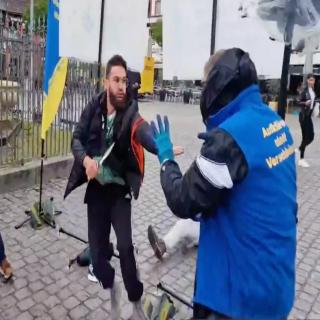  Basic Pre-Trained YOLOv11 Model Result

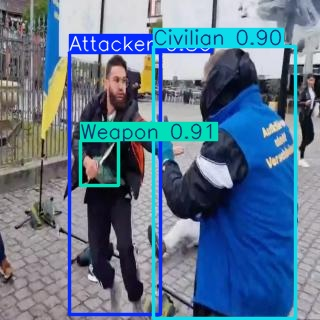 Fine-Tuning/Transfer Learning YOLOv11 Model Result

# Evaluation Metrics

To evaluate the performance of your object detection model and provide insights based on the results shown in the image

mAP (90.1%), Precision (93.3%), and Recall (83.7%) — indicate  well our object detection model is performing

High precision (93.3%) shows the model is confident and accurate with its predictions.
High mAP (90.1%) suggests a good balance between precision and recall across all classes.Recall (83.7%) indicates room for improvement in identifying all objects, particularly for challenging cases.There is a trade-off between precision and recall. Increasing recall may slightly reduce precision, and vice versa.